## Developed by Jonathan Ojeda 16-3-2021 QAAFI UQ
### Function: Create, write, edit and explore NetCDF files

In [1]:
#Import required packages
import netCDF4 as nc
import numpy as np
import xarray as xr
import csv
import matplotlib as mpl
import os
os.environ["PROJ_LIB"] = r'C:\Users\uqjojeda\Anaconda3\Library\share'; #fixr
from netCDF4 import Dataset
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import seaborn as sns
import matplotlib.ticker as ticker

#Extend screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [24]:
#Create a NetCDF Dataset
fn = 'C:/Users/uqjojeda/Nextcloud/PURTERRA-A0131/2020/data/campaign/created_campaign/test60.nc4'
ds = nc.Dataset(fn, 'w', format='NETCDF4')

In [25]:
#Add Dimensions
lat = ds.createDimension('lat', 360)
lon = ds.createDimension('lon', 720)
scen = ds.createDimension('scen', 8)

In [26]:
#Add NetCDF Variables
lats = ds.createVariable('lat', 'f8', ('lat',))
lats.units = 'degrees_north'
lats._Storage = 'contiguous'
lons = ds.createVariable('lon', 'f8', ('lon',))
lons.units = 'degrees_east'
lons._Storage = 'contiguous'
scens = ds.createVariable('scen', 'f4', ('scen',))

irr = ds.createVariable('automatic_irrigation', 'i4', ('scen',))
irr.units = 'Mapping'
irr.long_name = 'off,on,off,on,off,on,off,on'

cul = ds.createVariable('cultivar', 'f4', ('scen', 'lat', 'lon',))
cul.units = 'Mapping'
cul.long_name = 'GS,GS,SS,SS,FSPS,FSPS,FS,FS'
cul._DeflateLevel = 5

pdate1 = ds.createVariable('pdate1', 'f4', ('scen','lat', 'lon',))
pdate1.units = 'Julian day'
pdate1.long_name = 'Planting date1'
pdate1._DeflateLevel = 5

pdate2 = ds.createVariable('pdate2', 'f4', ('scen','lat', 'lon',))
pdate2.units = 'Julian day'
pdate2.long_name = 'Planting date2'
pdate2._DeflateLevel = 5

attr = ds.setncattr('person_notes','Jonathan Ojeda')
attr = ds.setncattr('history','pSIMS setup for sorghum modelling in USA')

In [27]:
#Assign Latitude and Longitude Values
lats[:] = np.arange(-89.75, 90.25, 0.5)
lons[:] = np.arange(-179.75, 180.25, 0.5)

In [28]:
#Create an array for a variable (e.g. planting date in Julian day) with variable values accordingly with the lat/lon combination
#This array needs to be previously created based on user purposes

pdateArray = []
with open(r'C:/Users/uqjojeda/Nextcloud/PURTERRA-A0131/2020/inputs/pdateCampaign.csv') as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats
    for row in reader: # each row is a list
        pdateArray.append(row)
        
pdateArray2 = []
with open(r'C:/Users/uqjojeda/Nextcloud/PURTERRA-A0131/2020/inputs/pdateCampaign.csv') as csvfile2:
    reader2 = csv.reader(csvfile2, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats
    for row in reader2: # each row is a list
        pdateArray2.append(row)

In [29]:
#Define name of scenarios and name and shape of variables (BE SURE YOU UPDATE THE NUMBER OF SCENARIOS TWICE!!!!)
for i in range(8):
    irr[i] = np.random.uniform(i+1,i+1, size=(8,))
    cul[i, :, :] = np.random.uniform(i+1,i+1, size=(360, 720))
    pdate1[i, :, :] = pdateArray
    pdate2[i, :, :] = pdateArray2
    scens[i] = i+1
    
#Close the netCDF file
ds.close()

In [30]:
#Explore Netcdf
data = xr.open_dataset(r'C:/Users/uqjojeda/Nextcloud/PURTERRA-A0131/2020/data/campaign/created_campaign/test60.nc4', decode_times=False)

In [31]:
data

<xarray.Dataset>
Dimensions:               (lat: 360, lon: 720, scen: 8)
Coordinates:
  * lat                   (lat) float64 -89.75 -89.25 -88.75 ... 89.25 89.75
  * lon                   (lon) float64 -179.8 -179.2 -178.8 ... 179.2 179.8
  * scen                  (scen) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0
Data variables:
    automatic_irrigation  (scen) int32 ...
    cultivar              (scen, lat, lon) float32 ...
    pdate1                (scen, lat, lon) float32 ...
    pdate2                (scen, lat, lon) float32 ...
Attributes:
    person_notes:  Jonathan Ojeda
    history:       pSIMS setup for sorghum modelling in USA

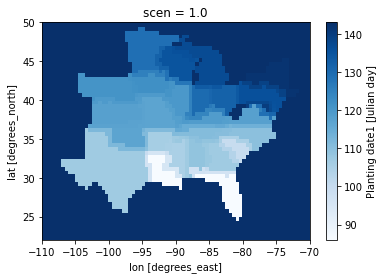

In [32]:
data.pdate1[0,0:,0:].plot(yincrease=True, x='lon', y='lat', xlim=(-110, -70), ylim=(22, 50), cmap=mpl.cm.Blues)